In [1]:
import json
import pandas as pd


In [9]:
df = pd.read_json('yelp_data/yelp_academic_dataset_user.json', lines=True)



In [11]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [12]:
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [13]:
import networkx as nx

In [24]:
df[["user_id", "friends"]].head(1)

,user_id,friends
0,q_QQ5kBBwlCcbL1s4NVK3g,"xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg..."


In [37]:
user_friend = df[["user_id", "friends"]].values.tolist()

In [41]:
edges = [(user, friend) for user, friends in user_friend for friend in friends.split()]

In [43]:
len(edges)

116040973

In [46]:
G = nx.Graph()

G.add_edges_from(edges)

In [47]:
import pickle

with open("user_network_graph.pickle", "wb") as f:
    pickle.dump(G, f, protocol=pickle.HIGHEST_PROTOCOL)

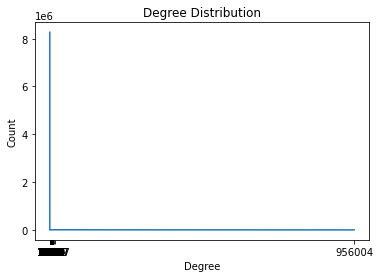

In [54]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.loglog(deg, cnt)

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

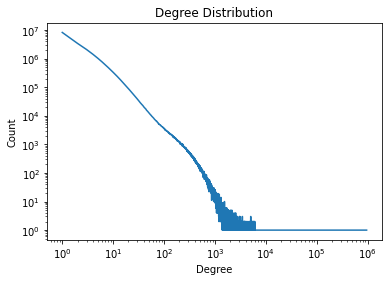

In [56]:
fig, ax = plt.subplots()
plt.loglog(deg, cnt)

plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()